# Assignment 2, part one 
# Blackbody radiation and determination of the Wien dissplacement Constant.
## Anna Rooney, 19333456, 3rd year Physics 2024
### [My github](https://github.com/arir2001/mitchison_lab2)
### PYU33C01, Computer Simulation I: Computational Methods (Mitchison)

### Part One -- Homework Tasks

**(Q1) Replot ?** 
- Use the function defined above to generate a longer array of $T$ and corresponding $\lambda_{\rm max}$ values in the same range.

- Use least square fitting methods in scipy to estimate the Wien displacement constant $b$.

- Plot the fit, and compare the estimated and true values of $b$.

[Go to (1) Results](#section1)

**(Q2) How does a planet's mass correlate with the mass of its star?**
By substituting a new integration variable $x = hc/(\lambda k_BT)$:
- Using the numerical integration routines in SciPy, numerically evaluate the integral over $x$. 
- Plot $W(T)$ as a function of temperature in the same range of temperatures used above.  
- Show that your result agrees with the Stefan-Boltzmann law $W(T) = \sigma T^4,$ where $\sigma$ is the Stefan-Boltzmann constant.

[Go to (2) Results](#section2)

## Black-body radiation -- lab 

The Planck radiation law describes the spectral density of radiation emitted by a black body in equilibrium.  
Before it was derived, others had noted that peak of the distribution changed as a function of temperature.   
This is the reason, for example, why a piece of metal glows 'red hot' at certain temperatures, but at very high temperatures glows 'white hot'.

Wilhelm Wien derived a relationship between temperature and the wavelength at which the black body spectral radiance peaks
$$ \lambda_{\rm max} = \frac{b}{T}$$
where $b$ is the _Wien displacement constant_.

Later, the Planck radiation law gave an exact expression for the black body spectral radiance (per unit wavelength) at a given temperature and wavelength:

$$ u (\lambda, T) = \frac{2 h c^2}{\lambda^5} \frac{1}{e^{h c / \lambda k_B T} - 1} $$



### Exercise 1
Define a function which returns the Planck radiation law as a function of wavelength and temperature.   
Plot the curve (in the range $10$ nm $<\lambda<1200$ nm) for several values of temperature in the range $3000$ K $< 8000$ K .

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
h = constants.Planck
c = constants.speed_of_light
kB = constants.Boltzmann

def radiance(wl, temp):
    u = (( 2*h*( c**2 ) )/( wl**5 )) * (1/( np.exp((h*c) / (wl*kB*temp)) - 1 ))
    return u

<>:6: SyntaxWarning: invalid escape sequence '\,'
<>:6: SyntaxWarning: invalid escape sequence '\,'
/tmp/ipykernel_851/3860959972.py:6: SyntaxWarning: invalid escape sequence '\,'
  ax.plot(wls, radiance(wls, temp), label=r'$T='+str(int(temp))+'\,\mathrm{K}$')


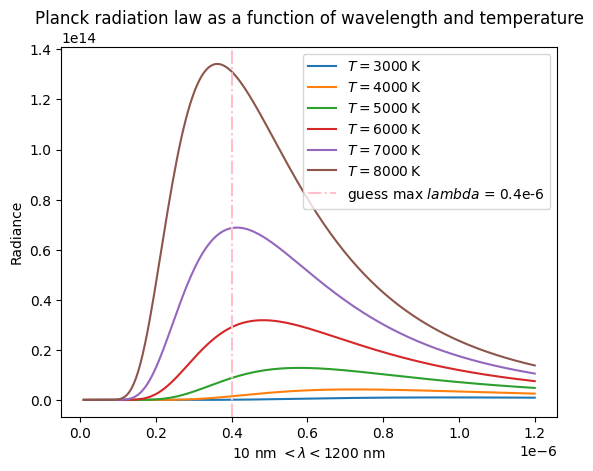

In [25]:
wls = np.linspace(1E-8, 1.2E-6, 200)
Ts = np.linspace(3000, 8000, 6)

fig, ax = plt.subplots()
for temp in Ts:
    ax.plot(wls, radiance(wls, temp), label=r'$T='+str(int(temp))+'\,\mathrm{K}$')

plt.axvline(x=0.4e-6, color='pink', linestyle='dashdot', label=r'guess max $lambda$ = 0.4e-6')  #plotting my estimated x0 

plt.xlabel(r'$10$ nm $<\lambda<1200$ nm')
plt.ylabel('Radiance')
plt.title('Planck radiation law as a function of wavelength and temperature')
ax.legend()
plt.show()

### Exercise 2
Write a function which uses the scipy library to find the wavelength for which the Planck expression is maximum at a given temperature.   
Replot the figure above, this time also indicating the maximum point.

In [26]:
from scipy.optimize import minimize
# from the graph abve -- radiance maximised when T = high K, and wavelength is 

In [27]:
# Function to find the maximum wavelength and corresponding spectral radiance
# as minimise finds the smallest, we turn all the outputs of the function to negatives and find the 'biggest' minimum. 

# Recommended: set minimize method to 'Nelder-Meald' and the tolerance (tol) to a small value e.g. 1E-16, to avoid overflow errors 
# scipy -- https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html


def minus_radiance(wl, temp):
    return -radiance(wl, temp)

x0 = 0.4e-6

def find_max_wl(temp):
    fmin = minimize(fun = (minus_radiance), x0 = x0, args=(temp), method='Nelder-Mead', tol = 1E-16) 
    return fmin.x[0], -fmin.fun     
    #fmin.x is the optimised parameter , ie wl at which radiance is max
    #-fmin.fun is the function at the max radiance. we - it to return it to positive. 

In [28]:
# Find positions of the maxima for each T

Ts = np.linspace(3000, 8000, 6)
max_wl = []
max_rad = []
for temp in Ts:
    print('for temp', temp, 'max wl is',  find_max_wl(temp)[0],'and the radiance is', find_max_wl(temp)[1])
    max_wl.append(find_max_wl(temp)[0])
    max_rad.append(find_max_wl(temp)[1])
    print()



for temp 3000.0 max wl is 9.659239885211e-07 and the radiance is 995248946227.483

for temp 4000.0 max wl is 7.244429874606434e-07 and the radiance is 4193970868053.2617

for temp 5000.0 max wl is 5.795543956756596e-07 and the radiance is 12798983361978.945

for temp 6000.0 max wl is 4.829619938042015e-07 and the radiance is 31847966279279.457

for temp 7000.0 max wl is 4.139674246311096e-07 and the radiance is 68836004276729.65

for temp 8000.0 max wl is 3.6222149491310114e-07 and the radiance is 134207067777704.31



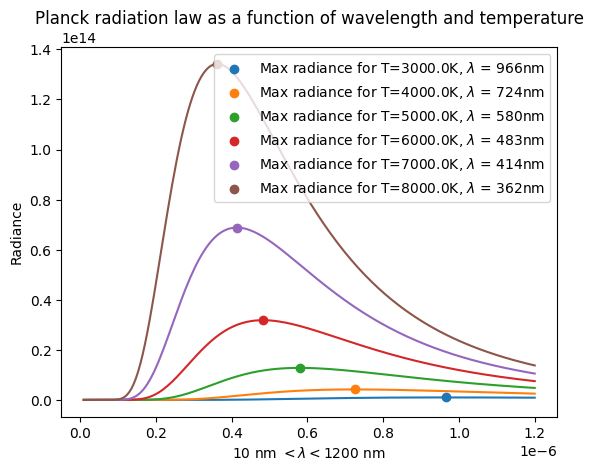

In [29]:
# Plot the results 
fig, ax = plt.subplots()
for ii, temp in enumerate(Ts):
    ax.plot(wls, radiance(wls, temp), label='')
    ax.scatter(max_wl[ii], max_rad[ii], label=fr'Max radiance for T={temp}K, $\lambda$ = {round(max_wl[ii]*1e9)}nm')

plt.xlabel(r'$10$ nm $<\lambda<1200$ nm')
plt.ylabel('Radiance')
plt.title('Planck radiation law as a function of wavelength and temperature')
ax.legend()
plt.show()

## Homework assignment

### Q1.
Use the function defined above to generate a longer array of $T$ and corresponding $\lambda_{\rm max}$ values in the same range.

Use least square fitting methods in scipy to estimate the Wien displacement constant $b$.

Plot the fit, and compare the estimated and true values of $b$.

In [30]:
from scipy.optimize import least_squares

b_true = constants.Wien
# Longer array of temperatures
T2s = np.linspace(3000, 8000, 200)

# Find the maxima
max_wl_2 = []
max_rad_2 = []
to_be_averaged = []
for temp in T2s:
    max_wl_2.append(find_max_wl(temp)[0])
    max_rad_2.append(find_max_wl(temp)[1])
    to_be_averaged.append(find_max_wl(temp)[0]*T2s)
    
# Function we are fitting to
def fun_to_fit(T, b):
    return b/T

# Residuals function (difference between model and data)
def residuals(b, T, wl):
    return fun_to_fit(T, b) - wl

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html least squares documentation

# Calculate average values of max wavelength calculated above, times the temperature at which it is caluclated. 
#This provides a data driven initial guess for b. 

p0 = np.mean(to_be_averaged)

fitting = least_squares(residuals, p0, args=(T2s, max_wl_2))

print('The least squares fitting is', fitting.x[0], 'while the true value is', b_true)
print('The difference in percent is',((fitting.x[0] - b_true)/b_true)*100,'%' )

b_estimate = fitting.x[0]

The least squares fitting is 0.0031290871750223144 while the true value is 0.002897771955
The difference in percent is 7.9825197984675205 %


In [31]:

peak_b_estimate = [fun_to_fit(T, b_estimate) for T in T2s]

peak_b_known = [fun_to_fit(T, b_true) for T in T2s]


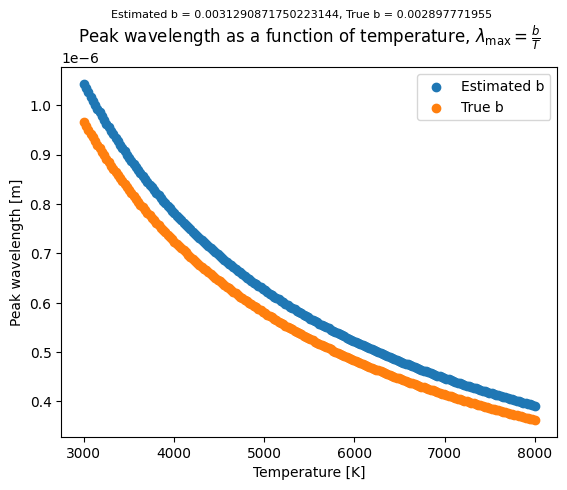

In [32]:
fig, ax = plt.subplots()

ax.scatter(T2s, peak_b_estimate, label ='Estimated b')
ax.scatter(T2s, peak_b_known, label = 'True b')
ax.set_ylabel('Peak wavelength [m]')
ax.set_xlabel('Temperature [K]')
plt.title(r'Peak wavelength as a function of temperature, $ \lambda_{\rm max} = \frac{b}{T}$')
fig.suptitle(f'Estimated b = {b_estimate}, True b = {b_true}', fontsize=8, y=1)  
plt.legend()
plt.show()

<a id="section1"> Question 1 result </a>

### Q2.
The total radiant power emitted per unit area (the exitance) of a large, flat black-body surface is found by integrating the spectral radiance over wavelength and over solid angle, yielding *(see below for an explanation of the factor of $\pi$)*
$$ W(T) = \pi \int_0^\infty {\rm d}\lambda \, u(\lambda,T).$$


By substituting a new integration variable $x = hc/(\lambda k_BT)$, first convince yourself _(I don't need to see your working)_ that the exitance can be written in the form
$$ W(T) = f(T) \int_0^\infty {\rm d}x \frac{x^3}{e^x-1},$$
where $f(T)$ is to be determined. Now, using the numerical integration routines in SciPy, numerically evaluate the integral over $x$. Plot $W(T)$ as a function of temperature in the same range of temperatures used above.  Show that your result agrees with the Stefan-Boltzmann law $W(T) = \sigma T^4,$ where $\sigma$ is the Stefan-Boltzmann constant.

**Explanation:**

More precisely, writing out the integral over solid angle explicitly, we have
$$W(T) =  \int_0^{\pi/2}{\rm d}\theta \sin \theta \int_0^{2\pi} {\rm d}\phi \, \int_0^\infty {\rm d}\lambda \, u(\lambda,T) \times \cos\theta,$$
where $\theta$ and $\phi$ are the usual polar and azimuthal angle in spherical polar coordinates, which we integrate over the entire half-sphere into which the radiation is emitted ($0<\theta<\pi/2$ and $0<\phi<2\pi$). The extra factor of $\cos\theta$ arises because the intensity depends on the angle between the point of observation and the black-body surface: in particular, intensity is maximised in the direction perpendicular to the surface (defined by $\theta=0$); see the diagram [here](https://en.wikipedia.org/wiki/Stefan–Boltzmann_law#Derivation_from_Planck's_law). Evaluating the integral over the angular variables yields
$$ \int_0^{\pi/2}{\rm d}\theta \int_0^{2\pi} {\rm d}\phi \sin \theta  \cos\theta = \pi$$

In [37]:
from scipy.integrate import quad
from scipy.constants import hbar, h, c
SB = constants.Stefan_Boltzmann

sigma = (2* np.pi**2 * SB**4)/(60 * (hbar**3) * (c**2))

#the integral of equation 2 
def wt_integrand(x):
    return (x**3)/(np.expm1(x))

def wt_SB_law(T):
    return sigma * (T**4)

I = quad(wt_integrand, 0, np.inf)

print('The integral is', I[0], 'with an error of', I[1])

def f(T):
    return I[0] * ((2*np.pi*h)/c**2 )*((T*SB/h)**4)


The integral is 6.49393940226683 with an error of 2.628470021985931e-09


/tmp/ipykernel_851/3964800961.py:9: RuntimeWarning: overflow encountered in expm1
  return (x**3)/(np.expm1(x))


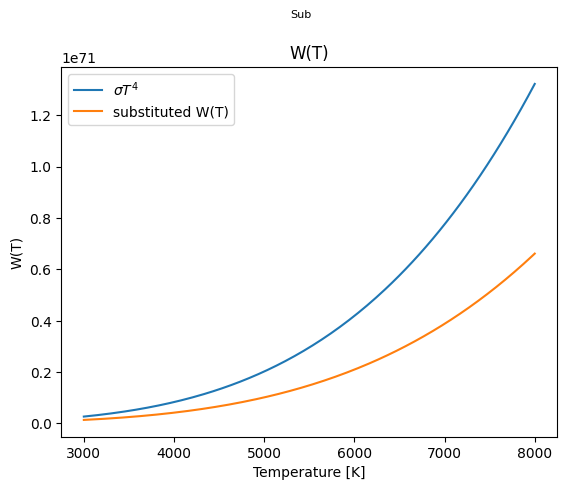

In [38]:
fig, ax = plt.subplots()
ax.plot(T2s, [wt_SB_law(T) for T in T2s], label =r'$ \sigma T ^4$')
ax.plot(T2s, [f(T) for T in T2s], label ='substituted W(T)')
ax.set_ylabel('W(T)')
ax.set_xlabel('Temperature [K]')
plt.title('W(T)')
fig.suptitle('Sub', fontsize=8, y=1)  
plt.legend()
plt.show()

<a id="section2"> Question 2 result </a>